## Importing Libraries


In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import iqr

## Loading and exploring data

In [198]:
df = pd.read_csv('data/data.csv',sep=';')

In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20739 entries, 0 to 20738
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        20739 non-null  int64 
 1   job        20739 non-null  object
 2   marital    20739 non-null  object
 3   education  20739 non-null  object
 4   default    20739 non-null  object
 5   balance    20739 non-null  int64 
 6   housing    20739 non-null  object
 7   loan       20739 non-null  object
 8   contact    20739 non-null  object
 9   day        20739 non-null  int64 
 10  month      20739 non-null  object
 11  duration   20739 non-null  int64 
 12  campaign   20739 non-null  int64 
 13  pdays      20739 non-null  int64 
 14  previous   20739 non-null  int64 
 15  poutcome   20739 non-null  object
 16  y          20739 non-null  object
dtypes: int64(7), object(10)
memory usage: 2.7+ MB


In [200]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Cleaning data

In [201]:
obj_cols = df.select_dtypes('object').columns
df[obj_cols] = df[obj_cols].apply(lambda x: x.str.lower())

In [202]:
df.loc[df['job']=='admin.','job'] = 'administrative'        # admin.    ->   administrative
df.loc[df['marital']=='div.','marital'] = 'divorced'        # div.      ->   divorced
df.loc[df['poutcome']=='unk','poutcome'] = 'unknown'        # unk.      ->   unknown
df.loc[df['education']=='unk','education'] = 'unknown'      # unk.      ->   unknown
df.loc[df['education']=='sec.','education'] = 'secondary'   # sec.      ->   secondary
df.loc[df['contact']=='cellular','contact'] = 'telephone'   # cellular  ->   telephone

In [ ]:
# change yes/no -> True/False (bool)
temp = {'no': False, 'yes': True}
df[['default', 'loan', 'y']] = df[['default', 'loan', 'y']].replace(temp).astype(bool)

In [204]:
# Drop outliers
q1 = np.percentile(df['age'],25)
q3 = np.percentile(df['age'],75)

min = q1-1.5*iqr(df['age'])
max = q3+1.5*iqr(df['age'])

outliers = df[(df['age']<min ) | (df['age']>max)]
outliers

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
229,530,services,divorced,secondary,False,1467,yes,False,unknown,5,may,124,1,-1,0,unknown,False
1076,490,services,single,primary,False,114,yes,False,unknown,7,may,99,2,-1,0,unknown,False
2229,123,student,single,tertiary,False,250,yes,False,unknown,12,may,166,2,-1,0,unknown,False
3018,332,administrative,single,secondary,False,91,yes,False,unknown,14,may,302,2,-1,0,unknown,False
5799,311,self-employed,single,secondary,False,360,yes,False,unknown,26,may,592,4,-1,0,unknown,False
6053,399,blue-collar,married,primary,False,2805,yes,False,unknown,26,may,102,23,-1,0,unknown,False


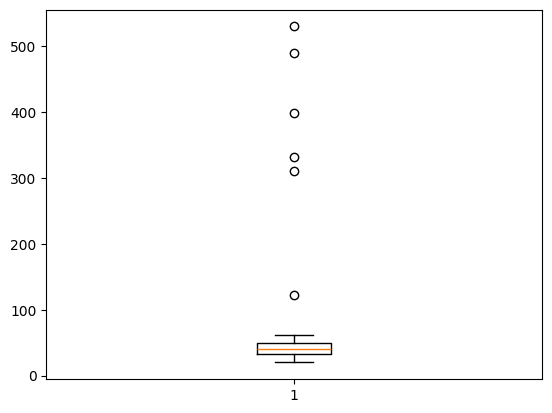

In [205]:
plt.boxplot(df['age'])
plt.show()

In [206]:
df.drop(outliers.index,inplace=True)

In [207]:
df.to_csv('data/clean_data.csv',)

In [208]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,False,2143,yes,False,unknown,5,may,261,1,-1,0,unknown,False
1,44,technician,single,secondary,False,29,yes,False,unknown,5,may,151,1,-1,0,unknown,False
2,33,entrepreneur,married,secondary,False,2,yes,True,unknown,5,may,76,1,-1,0,unknown,False
3,47,blue-collar,married,unknown,False,1506,yes,False,unknown,5,may,92,1,-1,0,unknown,False
4,33,unknown,single,unknown,False,1,no,False,unknown,5,may,198,1,-1,0,unknown,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20734,52,management,married,secondary,False,-892,yes,False,telephone,13,aug,295,2,-1,0,unknown,False
20735,51,administrative,married,secondary,False,21,no,True,telephone,13,aug,157,2,-1,0,unknown,False
20736,35,technician,married,secondary,False,-180,no,True,telephone,13,aug,823,2,-1,0,unknown,True
20737,51,administrative,married,secondary,False,79,no,False,telephone,13,aug,89,2,-1,0,unknown,False
